In [8]:
# import libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

# Model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier)
from xgboost import XGBClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

#### Load the dataset

In [2]:
data = pd.read_csv("BankChurners.csv")

In [3]:
data.shape

(10127, 22)

In [4]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Unnamed: 21  
0                  0.061          NaN  
1                  0.105          NaN  
2                  0.000          NaN  
3                  0.760          NaN  
4                  0.000          NaN  

[5 rows x 22 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null int64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null int

Perform an Exploratory Data Analysis on the data
- Univariate analysis - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive

- There are total 22 columns and 10,127 observations in the dataset
- We can see that none of the columns have null values except Unnames: 21 that has all nulls. It needs to verified and dropped.
- The dataset contains both numeric (int64, float64) and categorical (object) data types.

#### Summary of the dataset

In [9]:
data.describe(include='all')

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
count   1.012700e+04              10127  10127.000000  10127     10127.000000   
unique           NaN                  2           NaN      2              NaN   
top              NaN  Existing Customer           NaN      F              NaN   
freq             NaN               8500           NaN   5358              NaN   
mean    7.391776e+08                NaN     46.325960    NaN         2.346203   
std     3.690378e+07                NaN      8.016814    NaN         1.298908   
min     7.080821e+08                NaN     26.000000    NaN         0.000000   
25%     7.130368e+08                NaN     41.000000    NaN         1.000000   
50%     7.179264e+08                NaN     46.000000    NaN         2.000000   
75%     7.731435e+08                NaN     52.000000    NaN         3.000000   
max     8.283431e+08                NaN     73.000000    NaN         5.000000   

       Education_Level Marital_Status Income_Category Card_Category  \
count            10127          10127           10127         10127   
unique               7              4               6             4   
top           Graduate        Married  Less than $40K          Blue   
freq              3128           4687            3561          9436   
mean               NaN            NaN             NaN           NaN   
std                NaN            NaN             NaN           NaN   
min                NaN            NaN             NaN           NaN   
25%                NaN            NaN             NaN           NaN   
50%                NaN            NaN             NaN           NaN   
75%                NaN            NaN             NaN           NaN   
max                NaN            NaN             NaN           NaN   

        Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
count     10127.000000              10127.000000            10127.000000   
unique             NaN                       NaN                     NaN   
top                NaN                       NaN                     NaN   
freq               NaN                       NaN                     NaN   
mean         35.928409                  3.812580                2.341167   
std           7.986416                  1.554408                1.010622   
min          13.000000                  1.000000                0.000000   
25%          31.000000                  3.000000                2.000000   
50%          36.000000                  4.000000                2.000000   
75%          40.000000                  5.000000                3.000000   
max          56.000000                  6.000000                6.000000   

        Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count            10127.000000  10127.000000         10127.000000   
unique                    NaN           NaN                  NaN   
top                       NaN           NaN                  NaN   
freq                      NaN           NaN                  NaN   
mean                 2.455317   8631.953698          1162.814061   
std                  1.106225   9088.776650           814.987335   
min                  0.000000   1438.300000             0.000000   
25%                  2.000000   2555.000000           359.000000   
50%                  2.000000   4549.000000          1276.000000   
75%                  3.000000  11067.500000          1784.000000   
max                  6.000000  34516.000000          2517.000000   

        Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
count      10127.000000          10127.000000     10127.000000   
unique              NaN                   NaN              NaN   
top                 NaN                   NaN              NaN   
freq                NaN                   NaN              NaN   
mean        7469.139637              0.759941      4404.086304   
std         9090.685324              0.219207      3397.129

Observations
- Most of the customers did not close their accounts
- 75% of the customers are aged under 52
- More of the customers are female compared to male
- Most of the customers are graduate level and married
- Most of the customers have income under $40k
- 75% of customers have credit limit under 11000 USD

In [12]:
# checking for unique values in CLIENTNUM column
data["CLIENTNUM"].nunique()

10127

In [13]:
data['Unnamed: 21'].value_counts(dropna=False)

NaN    10127
Name: Unnamed: 21, dtype: int64

- Since all the values in CLIENTNUM column are unique we can drop it
- Also drop Unnamed: 21 as it has all nulls

In [13]:
data['Unnamed: 21'].value_counts(dropna=False)

NaN    10127
Name: Unnamed: 21, dtype: int64

In [14]:
data.drop(['CLIENTNUM','Unnamed: 21'], axis=1, inplace=True)

#### Check for missing values

In [15]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

- There are no missing values in the dataset

In [18]:
data.select_dtypes(include='object').columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

### Perform an Exploratory Data Analysis on the data

#### Univariate analysis

In [18]:
data.select_dtypes(include='object').columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [21]:
# function to plot distribution of categorical features
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=data)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

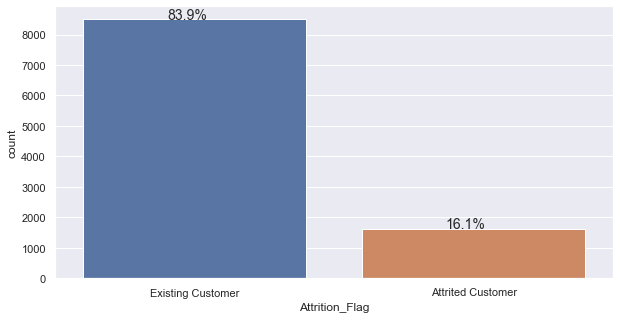

In [22]:
# observations on Marital_Status
perc_on_bar(data["Attrition_Flag"])

- Approx 84% of the customers are existing customers who did NOT attrited
- This shows that the distribution of classes in target variable is imbalanced. We have only ~16% observations where customer is attrited.

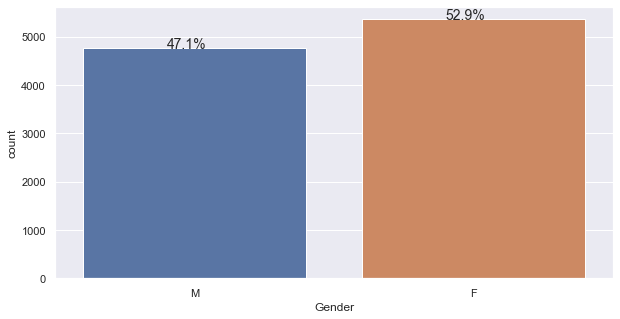

In [23]:
# observations on Gender
perc_on_bar(data["Gender"])

- Approx 47% of the customers are Male and 53% of the customers are female

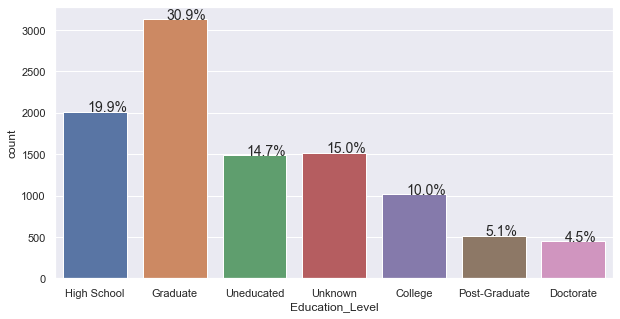

In [24]:
# observations on Education_Level
perc_on_bar(data["Education_Level"])

- Education of approx 31% of customers is at Graduate level
- 15% of the customer education is unknown
- Less than 5% of the customers are doctorate level

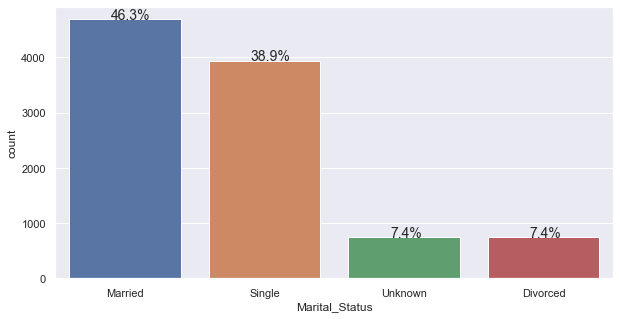

In [25]:
# observations on Marital_Status
perc_on_bar(data["Marital_Status"])

- Majority of the customers are married comprising approx 46% of total customers while ~39% of the customers are single
- Approx 7% of the customer mariotal status is unknown and ~7% of the customers are divorced status

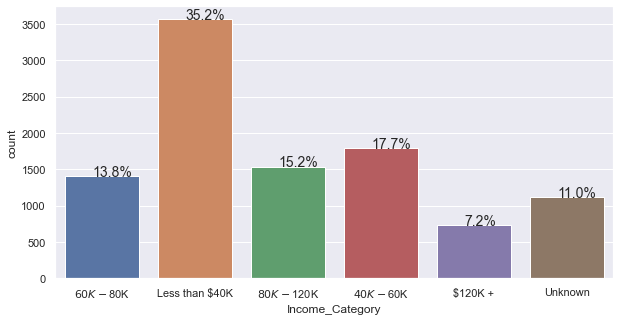

In [26]:
# observations on Income_Category
perc_on_bar(data["Income_Category"])

- Majority of the customers have income category under $40K comprising of 35.5% of total customers
- Income of ~11% of the customers is unknown


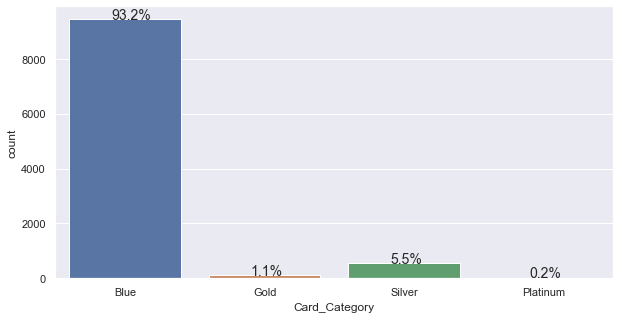

In [27]:
# observations on Card_Category
perc_on_bar(data["Card_Category"])

- Majority of the customers have card categiry of Blue comprising of ~93% of total customers
- Very few customers (~0.2%) have platinum card

In [31]:
data.select_dtypes(include=['int64','float64']).columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [28]:
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

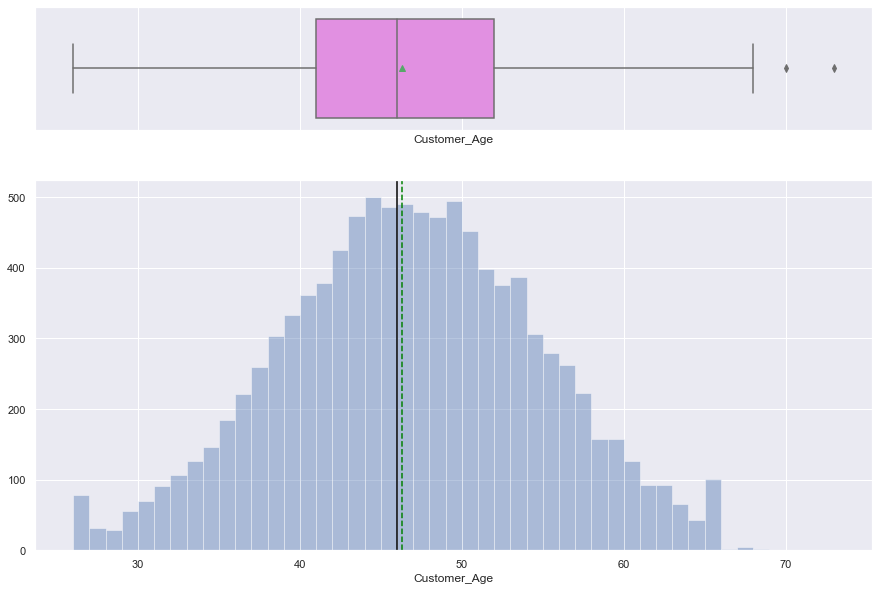

In [32]:
# Observations on Customer_age
histogram_boxplot(data["Customer_Age"])

- Customer age shows a farly normal distribution with approx equal mean and median
- From boxplot we can see that there are two outliers in the dataset for ages 70 and 73 which looks like a real trend so we will ignore the outliers

In [41]:
data["Customer_Age"].value_counts(dropna=False)

44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
60    127
33    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
73      1
70      1
Name: Customer_Age, dtype: int64

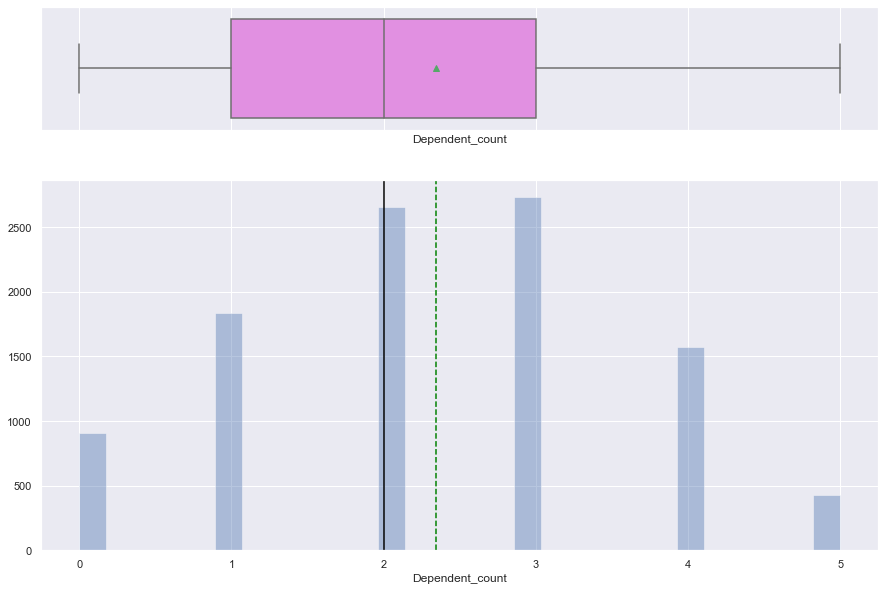

In [33]:
# observations on Dependent_count
histogram_boxplot(data["Dependent_count"])

- The median distribution of dependent_count is 2 i.e., 50% customers have 2 or less than 2 dependants

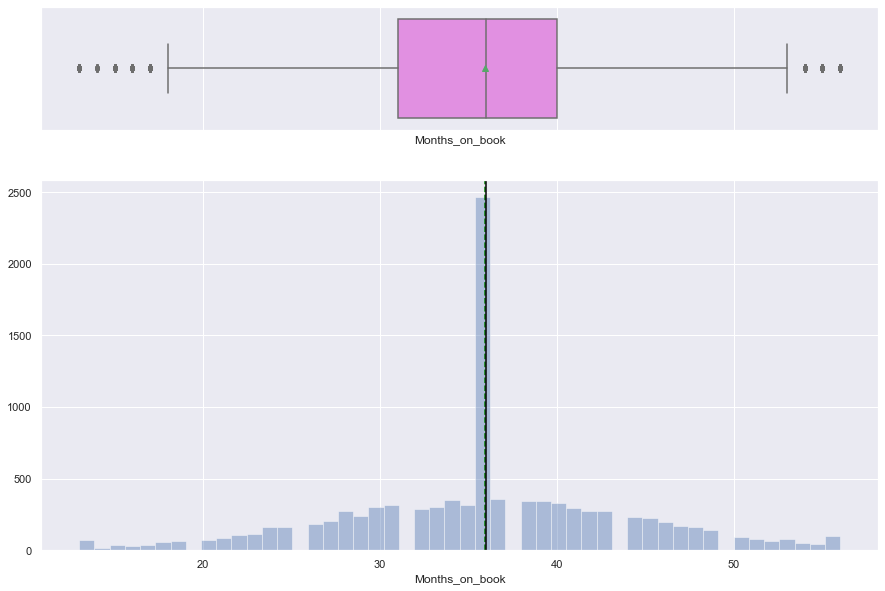

In [35]:
# observations on Months_on_book
histogram_boxplot(data["Months_on_book"])

- The median distribution of the distribution is about 36 i.e., 50% customers have 36 months or less relationship with the bank. Here the mean is almost equal to median
- The column has few outliers but we will not remove them as it represents real trend

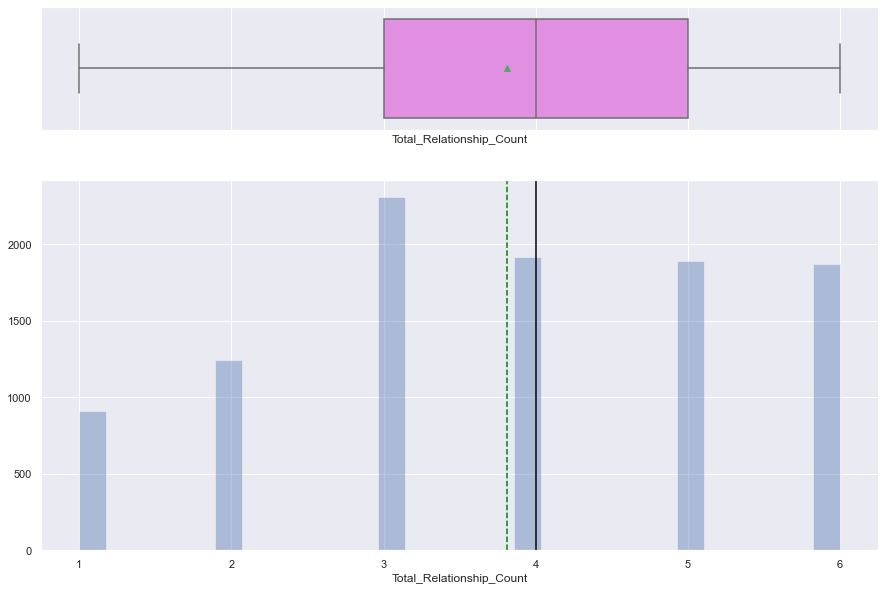

In [37]:
# observations on Total_Relationship_Count
histogram_boxplot(data["Total_Relationship_Count"])

- The median of the dsitribution is ~4 i.e., 50% of the customers have held total of 4 products or less from the bank
- There are no outiers in this column

In [40]:
data["Months_on_book"].value_counts(dropna=False)

36    2463
37     358
34     353
38     347
39     341
40     333
31     318
35     317
33     305
30     300
41     297
32     289
28     275
43     273
42     271
29     241
44     230
45     227
27     206
46     197
26     186
47     171
25     165
48     162
24     160
49     141
23     116
22     105
56     103
50      96
21      83
51      80
53      78
20      74
13      70
19      63
52      62
18      58
54      53
55      42
17      39
15      34
16      29
14      16
Name: Months_on_book, dtype: int64

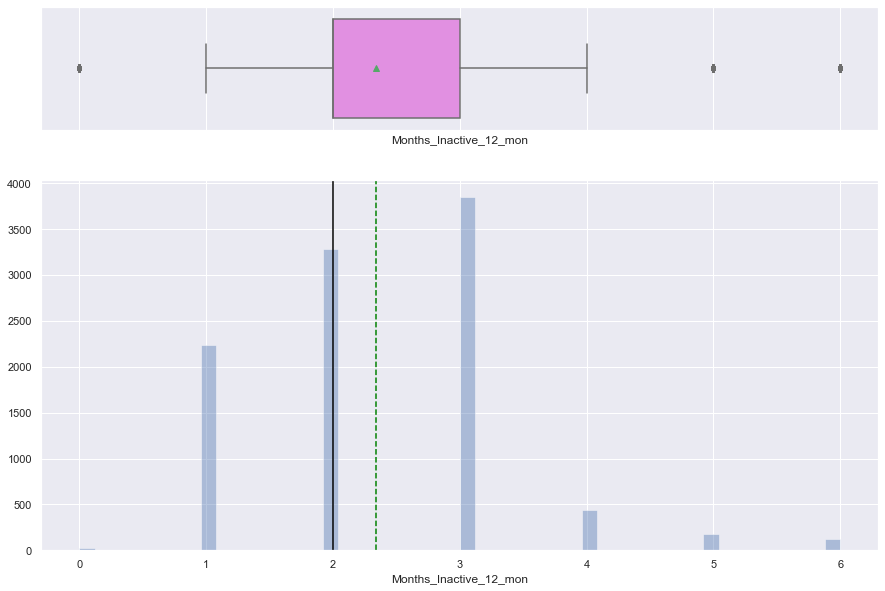

In [38]:
# observations on Months_Inactive_12_mon
histogram_boxplot(data["Months_Inactive_12_mon"])

In [39]:
data["Months_Inactive_12_mon"].value_counts()

3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64

- The median of the dsitribution is 2 i.e., 50% of the customers were inactive for 2 months or less with the bank
- There are 3 outliers in the variable but we will not remove these data points as it represents real trend.

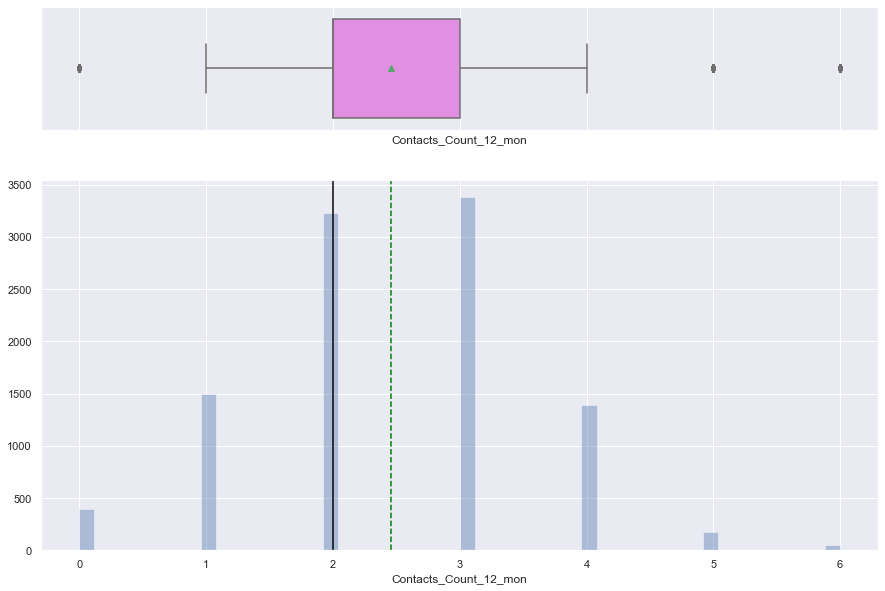

In [42]:
# observations on Contacts_Count_12_mon
histogram_boxplot(data["Contacts_Count_12_mon"])


In [43]:
data["Contacts_Count_12_mon"].value_counts()

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64

- The median of the dsitribution is 2 i.e., 50% of the customers had 2 contacts or less in the last 12 months
- There are 3 outliers in the variable but we will not remove these data points as it represents real trend.

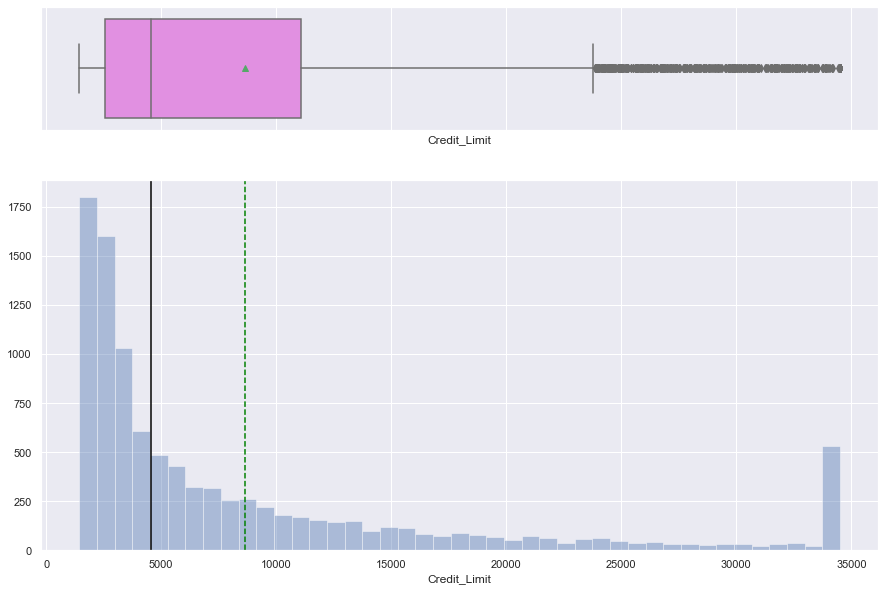

In [44]:
# observations on Credit_Limit
histogram_boxplot(data["Credit_Limit"])

In [46]:
data["Credit_Limit"].value_counts(dropna=False).sort_index()

1438.3     507
1439.0       2
1440.0       1
1441.0       2
1442.0       1
          ... 
34198.0      1
34427.0      1
34458.0      1
34496.0      1
34516.0    508
Name: Credit_Limit, Length: 6205, dtype: int64

In [47]:
data["Credit_Limit"].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

- The distribution for credit limit is right skewed
- Median credit limit for customers is ~4500 USD and mean is 8500 USD
- There are many outliers on the right end in the boxplot but we will not treat them as this represents real market trend that some customers can have much higher credit limit than others.

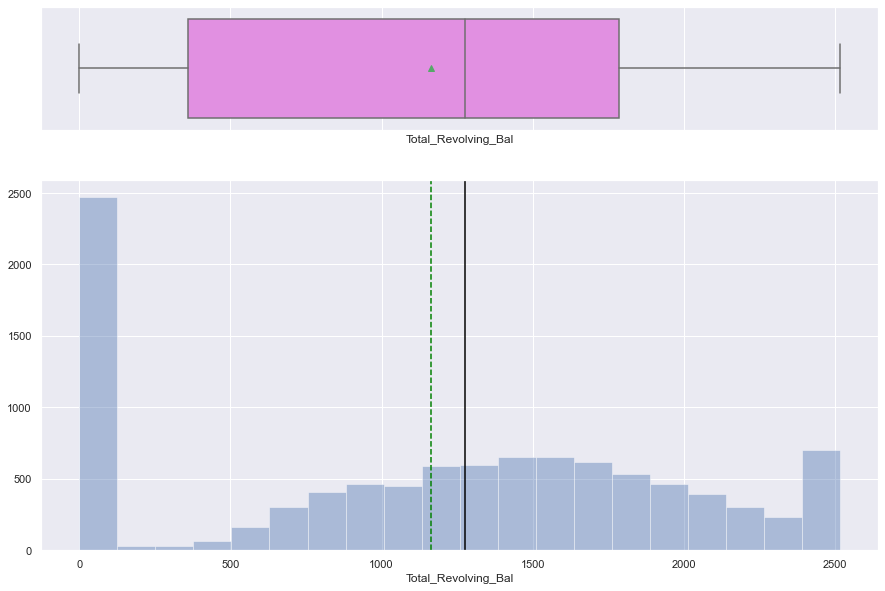

In [48]:
# observations on Total_Revolving_Bal
histogram_boxplot(data["Total_Revolving_Bal"])

In [49]:
data["Total_Revolving_Bal"].value_counts().sort_index()

0       2470
132        1
134        1
145        1
154        1
        ... 
2511       1
2512       2
2513       1
2514       3
2517     508
Name: Total_Revolving_Bal, Length: 1974, dtype: int64

In [52]:
data["Total_Revolving_Bal"].value_counts(normalize=True)

0       0.243902
2517    0.050163
1965    0.001185
1480    0.001185
1720    0.001086
          ...   
1401    0.000099
2293    0.000099
2172    0.000099
2040    0.000099
204     0.000099
Name: Total_Revolving_Bal, Length: 1974, dtype: float64

In [50]:
data["Total_Revolving_Bal"].describe()

count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64

- The median of the dsitribution is 1276 i.e., 50% of the customers had a total revolving balance of $1276 or less on their credit card
- There are no outliers in this variable but majority of customers has a balance of 0 comprising of ~24% of overall customers

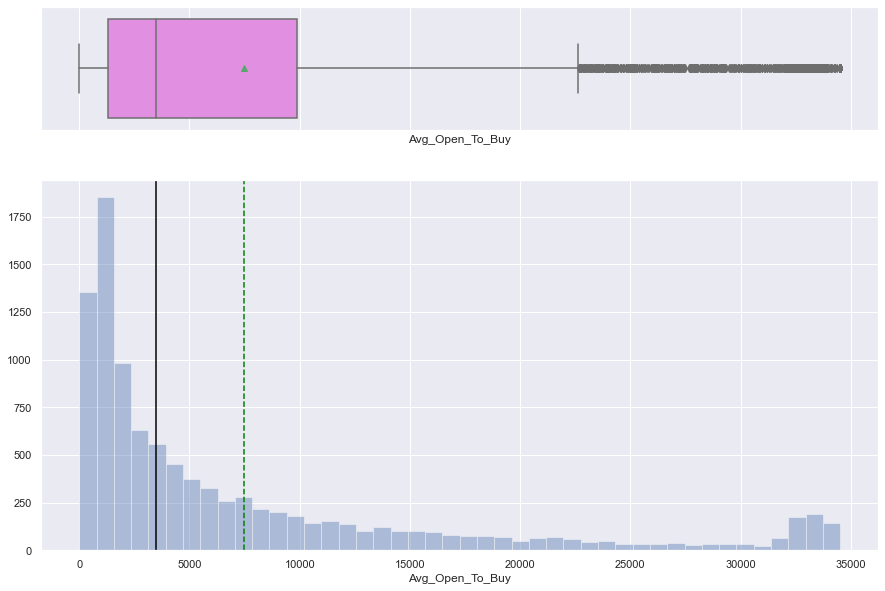

In [53]:
# observations on Avg_Open_To_Buy
histogram_boxplot(data["Avg_Open_To_Buy"])

In [54]:
data["Avg_Open_To_Buy"].value_counts()

1438.3     324
34516.0     98
31999.0     26
787.0        8
953.0        7
          ... 
2214.0       1
4458.0       1
8013.0       1
33398.0      1
4117.0       1
Name: Avg_Open_To_Buy, Length: 6813, dtype: int64

- The distribution for this variable is right skewed
- There are many outliers on the right end in the boxplot but we will not treat them as this represents real market trend that some customers can have much higher average open to buy credit line than others.

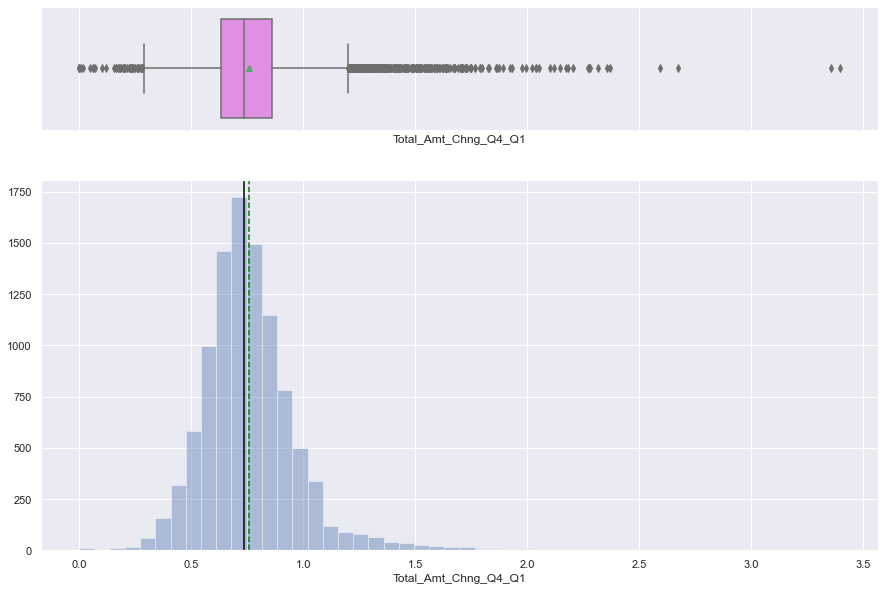

In [55]:
# observations on Avg_Open_To_Buy
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

In [57]:
data["Total_Amt_Chng_Q4_Q1"].value_counts()

0.791    36
0.743    34
0.712    34
0.735    33
0.718    33
         ..
0.330     1
1.252     1
2.271     1
0.175     1
1.750     1
Name: Total_Amt_Chng_Q4_Q1, Length: 1158, dtype: int64

- The distribution for this variable shows fairly normal distribution
- There are few outliers at both ends in the boxplots but data is right skewed. We will not treat them as this represents real market trend that some customers can have much higher change in transaction amount in Q4 over Q1

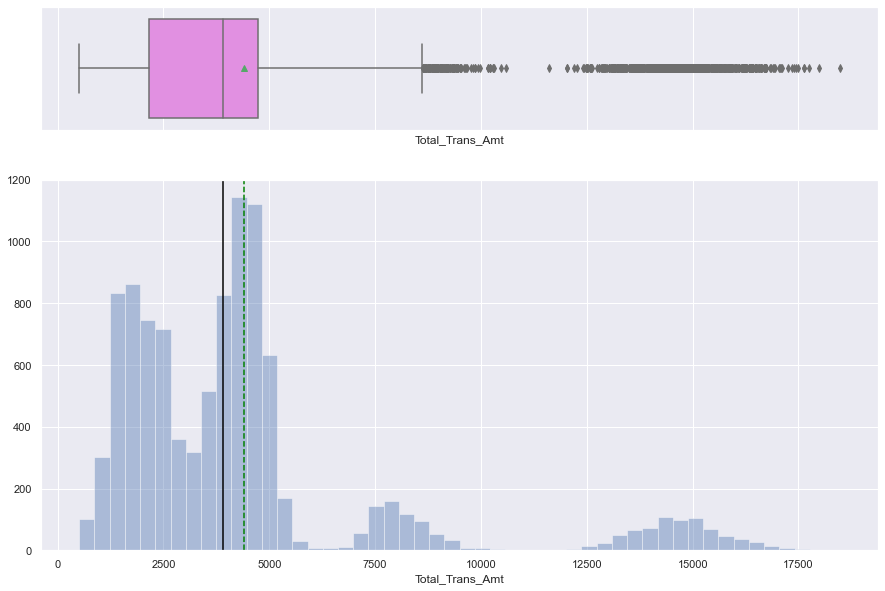

In [58]:
# observations on Total_Trans_Amt
histogram_boxplot(data["Total_Trans_Amt"])

- The distribution for this variable is fairly right skewed
- There are few outliers at right end in the boxplot. We will not treat them as this represents real market trend that some customers can have much higher total transaction amount than others

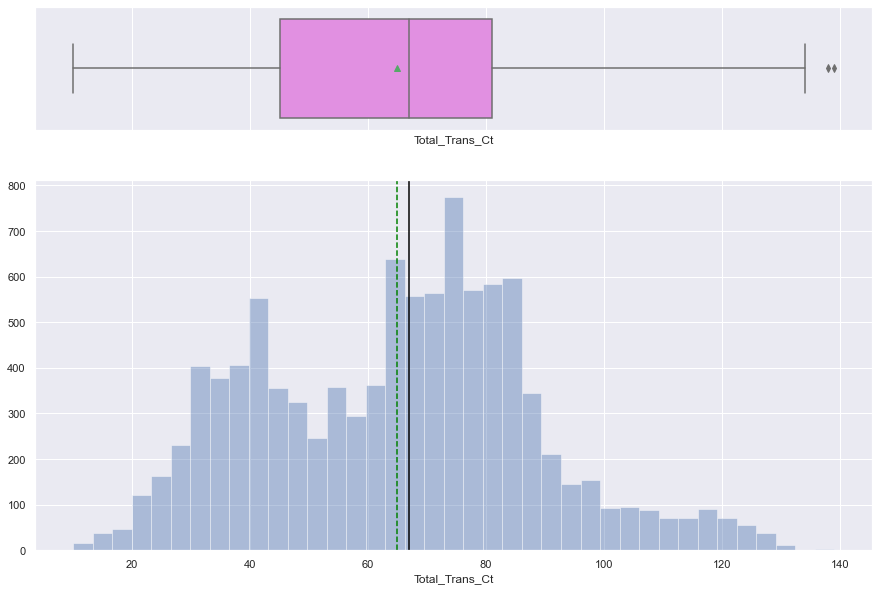

In [59]:
# observations on Total_Trans_Ct
histogram_boxplot(data["Total_Trans_Ct"])

- The distribution for this variable shows fairly normal distribution
- There are only two outliers that can be ignored as it represents real trend

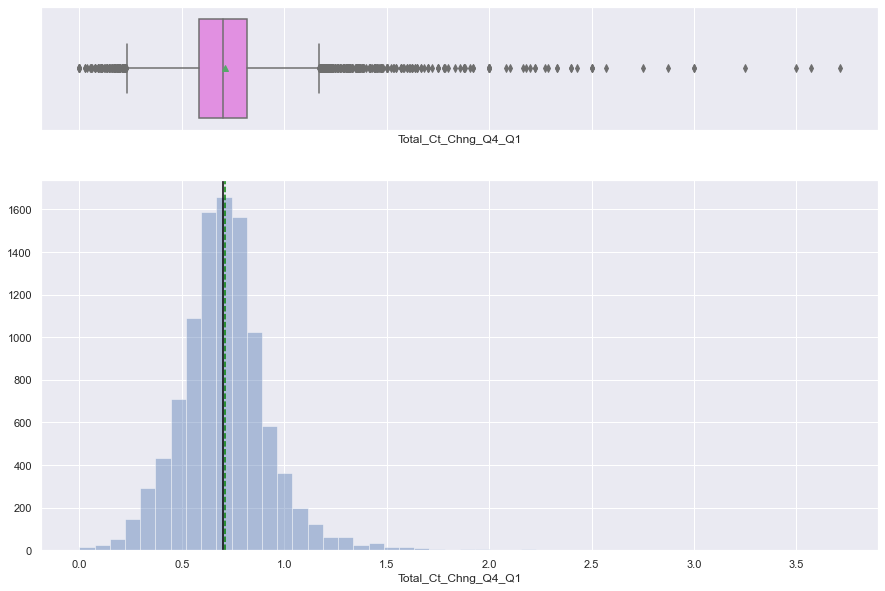

In [60]:
# observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

- The distribution for this variable shows fairly normal distribution
- There are few outliers at both ends in the boxplots but data is right skewed. We will not treat them as this represents real market trend that some customers can have much higher change in transaction count in Q4 over Q1 than others

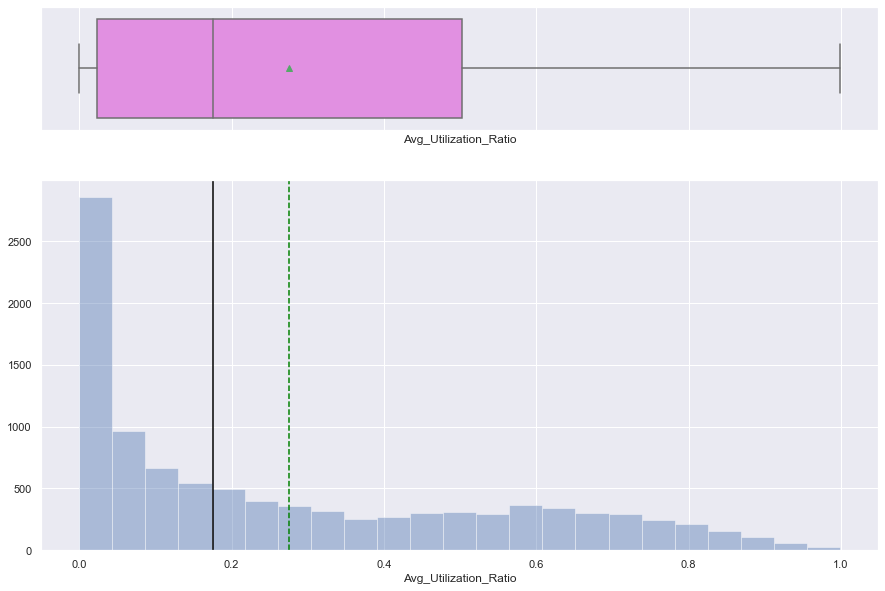

In [61]:
# observations on Avg_Utilization_Ratio
histogram_boxplot(data["Avg_Utilization_Ratio"])

In [62]:
data["Avg_Utilization_Ratio"].describe()

count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64

- The distribution for this variable is fairly right skewed
- There are no outliers in the dataset

#### Bivariate Analysis

In [66]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

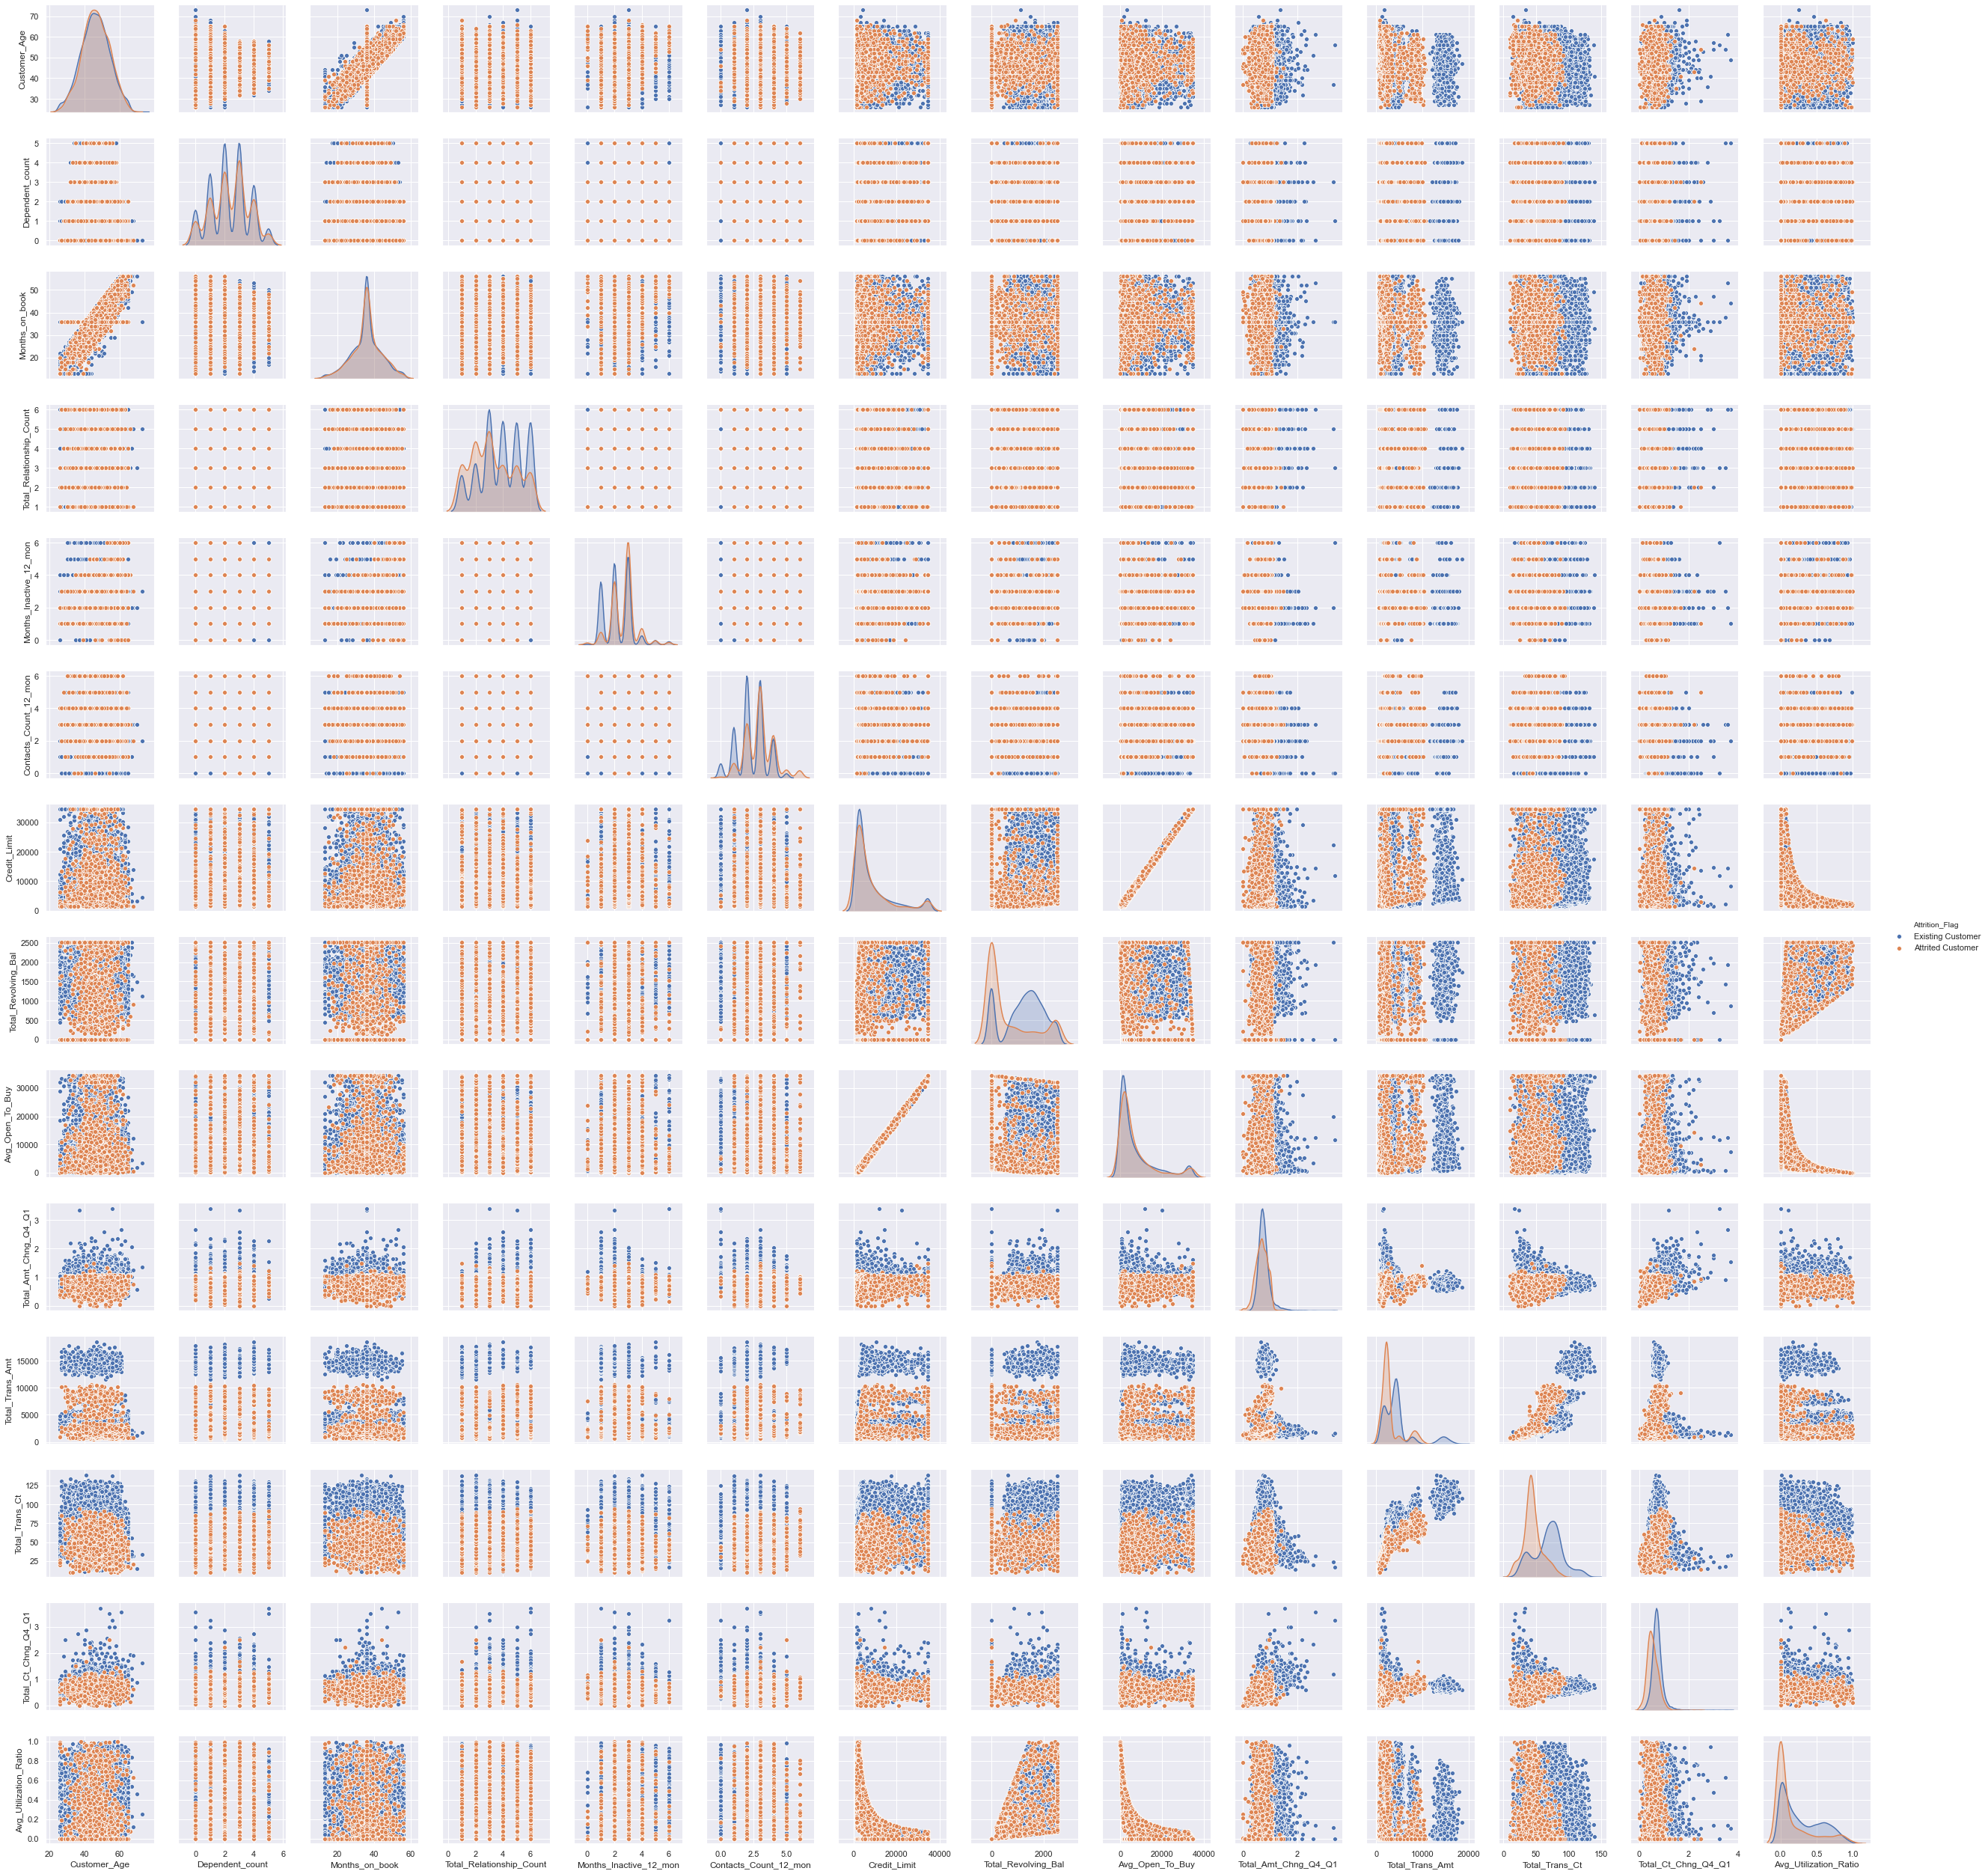

In [64]:
sns.pairplot(data, hue="Attrition_Flag")

- We see some level of distinction between columns. 
- For all customers having total change in transaction count less than 1 show high rate of attrition

In [148]:
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

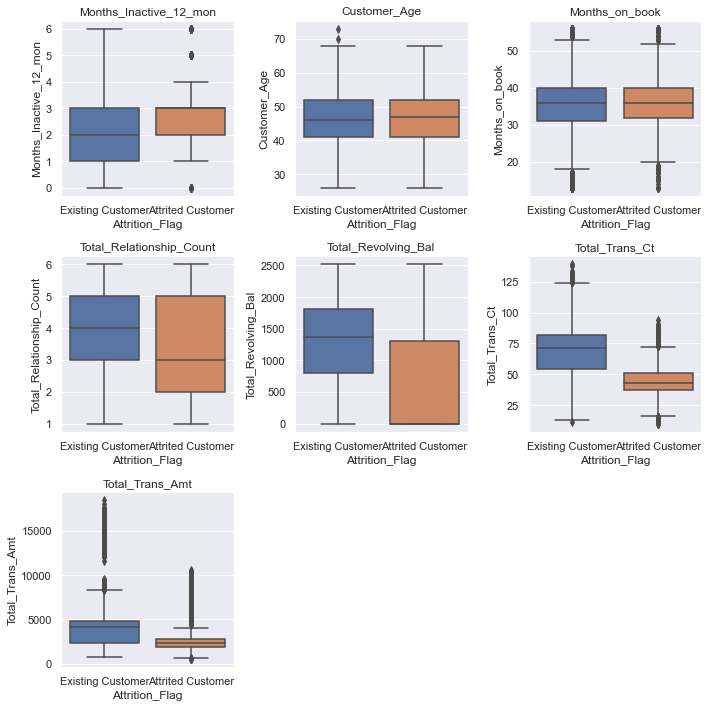

In [164]:
cols = data[["Months_Inactive_12_mon", "Customer_Age", "Months_on_book", "Total_Relationship_Count","Total_Revolving_Bal","Total_Trans_Ct","Total_Trans_Amt"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Customers with higher no of months inactive are more likely to churn
- Customers with lower total revolving balanve is more highly likely to churn
- Customers wuth lower total transaction count and transaction amount is highly likely to churn

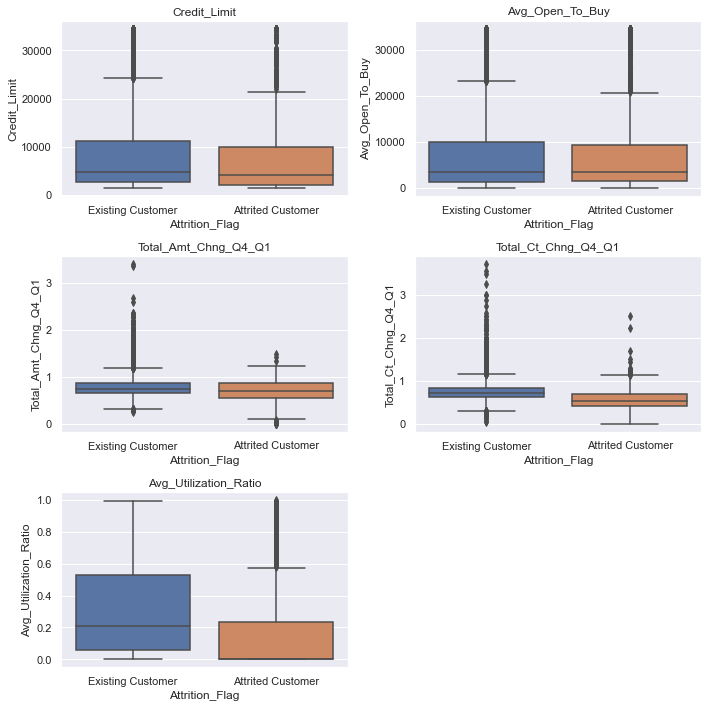

In [150]:
cols = data[["Credit_Limit", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Ct_Chng_Q4_Q1","Avg_Utilization_Ratio"]].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Attrition_Flag"], data[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Customers with lower credit limit are more likely to churn
- Customers with lower change in total amount from Q1 to Q4 are more likely to churn
- Customers with lower change in avg utilization ratio are more likely to churn

In [153]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


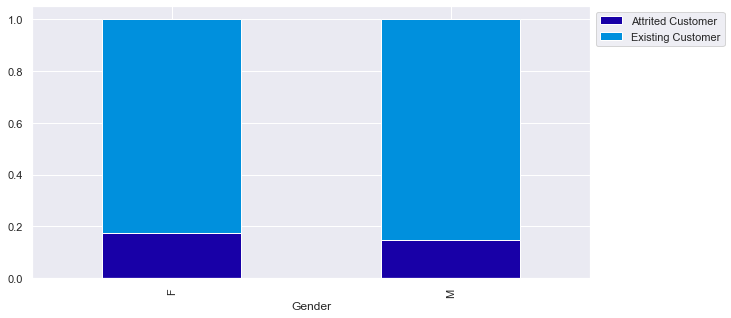

In [154]:
stacked_plot(data["Gender"])

- Female customers have a more likelihood of attrition compared to male

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


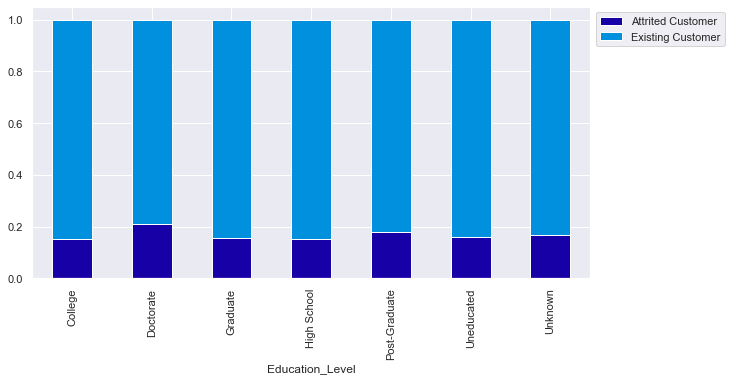

In [155]:
stacked_plot(data["Education_Level"])

- Customers with post-doctorate and doctorate education levels are more likely to churn

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


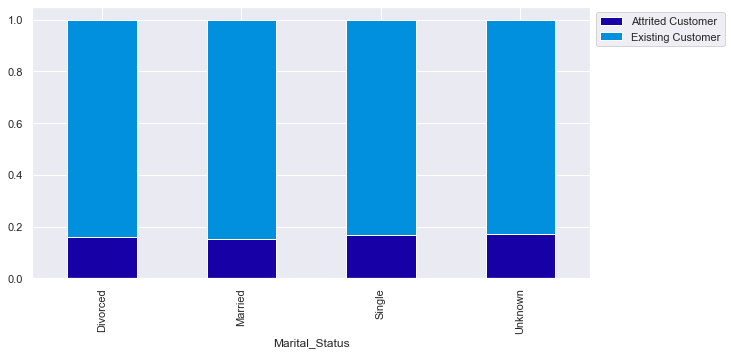

In [156]:
stacked_plot(data["Marital_Status"])

- No clear distinction between the marital status vs attrition levels but single, divorced have higher likelood compared to married

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


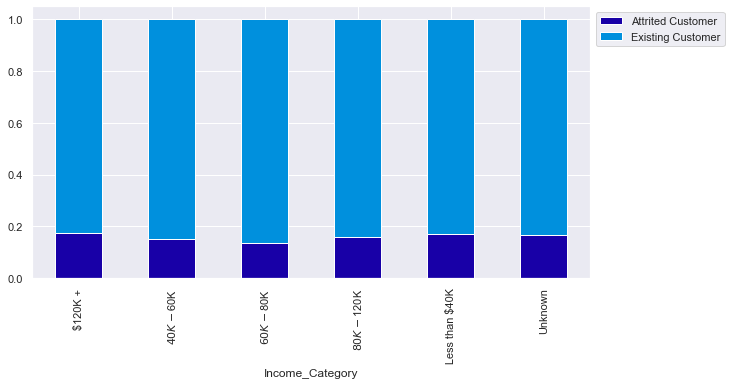

In [158]:
stacked_plot(data["Income_Category"])

- Customers with income category less than 40k$ and more than 120k$ are more likely to churn

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


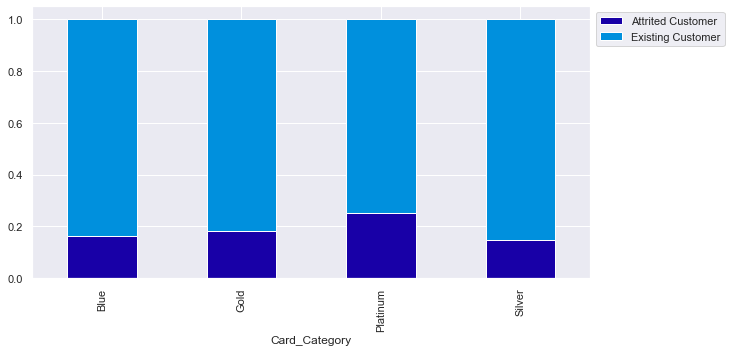

In [159]:
stacked_plot(data["Card_Category"])

- Customers with platinum card are more likely to churn

In [72]:
pd.crosstab(data['Attrition_Flag'], data['Total_Ct_Chng_Q4_Q1']>1)

Total_Ct_Chng_Q4_Q1  False  True 
Attrition_Flag                   
Attrited Customer     1585     42
Existing Customer     7874    626

In [70]:
pd.crosstab(data['Attrition_Flag'], data['Total_Ct_Chng_Q4_Q1']<1)

Total_Ct_Chng_Q4_Q1  False  True 
Attrition_Flag                   
Attrited Customer       59   1568
Existing Customer      775   7725

In [65]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

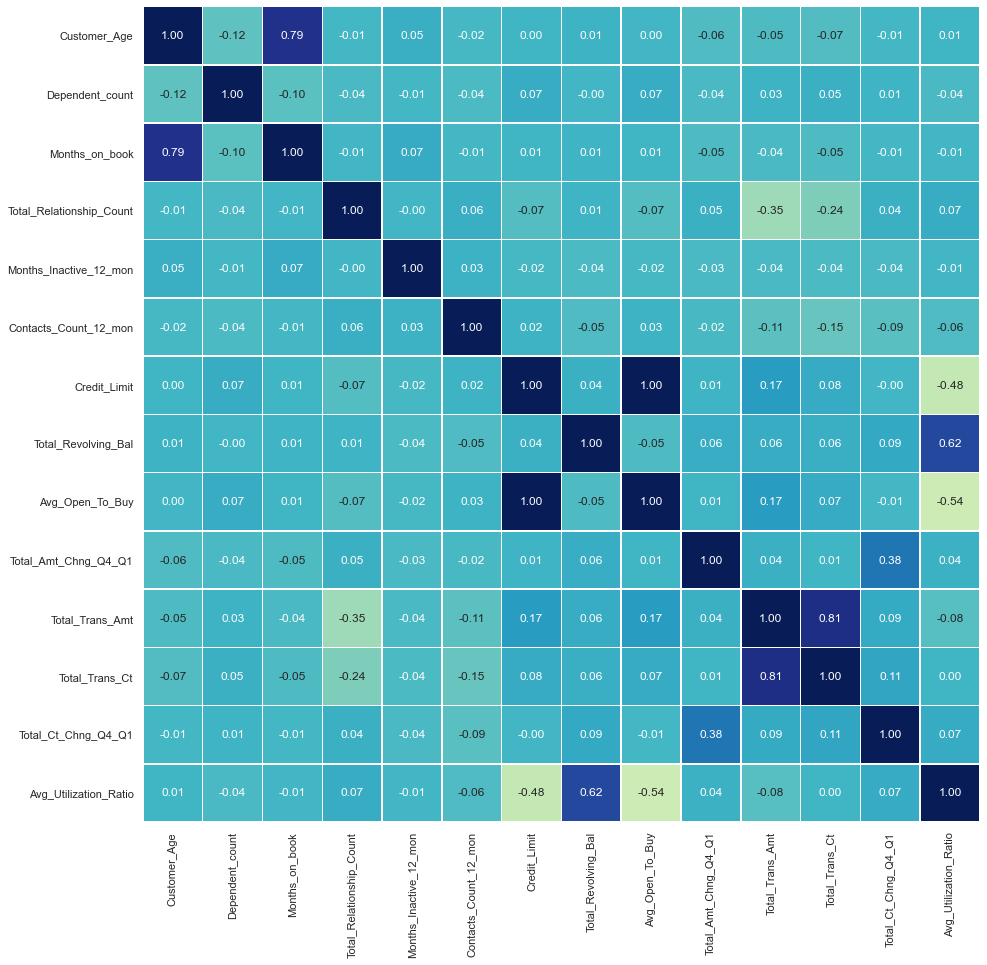

In [160]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

- As expected, total transaction count and total transaction amount have a very high positive correlation of ~81%
- Total revolving balance and avg utilization ratio have ~62% positive correlation
- Credit limit and Avg open to buy are prfectly correlated which indicates that one of this column can be dropped from the dataset if required
- As expected customer age and months on book have a high positive correlation of 71%
- Total amt change Q4 to Q1 and Total count change from q4 to a1 has ~38% positive correlation 

### Data Pre-processing

- There are no missing values in the dataset
- No outlier treatment is required in the dataset as explained in the univariate analysis

In [74]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [75]:
cat_cols = data.select_dtypes(include='object').columns

In [76]:
for col in cat_cols:
    print(data[col].value_counts(dropna=False))

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


In [96]:
data1 = data.copy()

In [97]:
# Attrition_Flag
flag = {'Existing Customer':0,'Attrited Customer':1}
data1['Attrition_Flag'] = data1['Attrition_Flag'].map(flag)

In [98]:
# Gender
gender = {'M':0,'F':1}
data1['Gender'] = data1['Gender'].map(gender)

In [99]:
# Education_Level
education_level = {'Doctorate':0,'Post-Graduate':1,'Graduate':2,'College':3,'High School':4,'Unknown':5,'Uneducated':6}
data1['Education_Level']=data1['Education_Level'].map(education_level)


In [100]:
# Marital_Status
marital_status = {'Married':1,'Single':2, 'Divorced':3, 'Unknown':4}
data1['Marital_Status']=data1['Marital_Status'].map(marital_status)

In [101]:
# Income_Category
income_category = {'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5,'Unknown':6}
data1['Income_Category']=data1['Income_Category'].map(income_category)

In [102]:
# Card_Category
card_category = {'Blue':1,'Silver':2,'Gold':3,'Platinum':4}
data1['Card_Category']=data1['Card_Category'].map(card_category)

In [103]:
data1.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0            45       0                3                4   
1               0            49       1                5                2   
2               0            51       0                3                2   
3               0            40       1                4                4   
4               0            40       0                3                6   

   Marital_Status  Income_Category  Card_Category  Months_on_book  \
0               1                3              1              39   
1               2                1              1              44   
2               1                4              1              36   
3               4                1              1              34   
4               1                3              1              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

- Values have been encoded.
- All unknowns has been treated as a separate category and not imputed with NaNs. 
- In this experiment we will treat all categorical columns as ordinal as they contain some level of ordering.

#### Prepare data for modeling

In [104]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")
Y = data1["Attrition_Flag"]

In [105]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


### Model building

#### Model evaluation criterion:

- From the problem statement we want to maximize recall because bank wants to know which customer's would potentially end up leaving so they can improve upon those areas
- We can achivee higher recall by reducing the False negatives i.e., predicting incorrectly that customer will not churn.

#### Logistic regression (no sampling)

- Make a logistic regression model - Improve model performance by up and downsampling the data - Regularize above models, if required

In [128]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [125]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

Let's evaluate the model performance by using KFold and cross_val_score

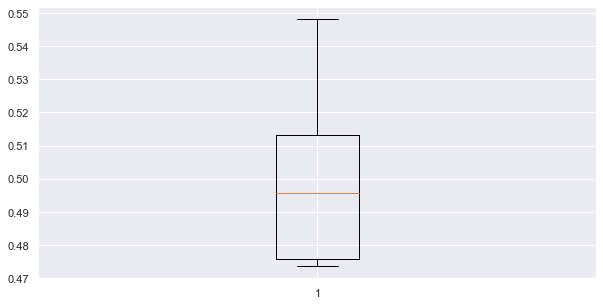

In [126]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on train set variaes between 0.47 to 0.55 recall

Accuracy on training set :  0.8788092550790068
Accuracy on test set :  0.8795656465942744
Recall on training set :  0.4433713784021071
Recall on test set :  0.4405737704918033
Precision on training set :  0.6917808219178082
Precision on test set :  0.698051948051948


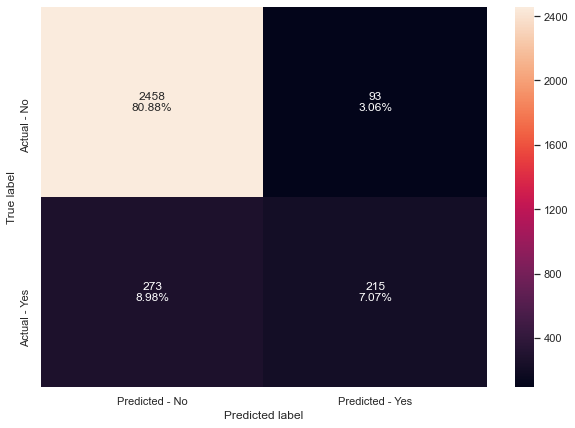

In [129]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

- Logistic Regression has given a generalized performance on training and test set.
- Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [130]:
from imblearn.over_sampling import SMOTE

In [131]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1139
Before UpSampling, counts of label 'No': 5949 

After UpSampling, counts of label 'Yes': 5949
After UpSampling, counts of label 'No': 5949 

After UpSampling, the shape of train_X: (11898, 19)
After UpSampling, the shape of train_y: (11898,) 



### Logistic Regression on oversampled data

In [132]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

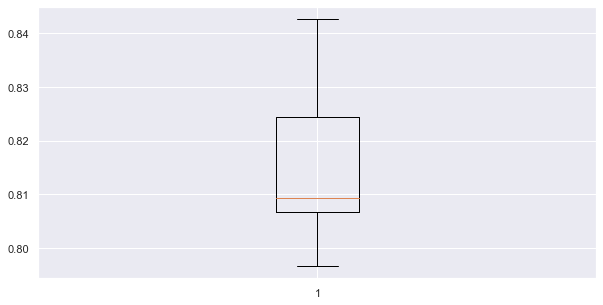

In [133]:
# k-fold and cross-val on train
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

- Performance of model on training set varies between 0.76 to 0.86, which is an improvement from the previous model
- Let's check the performance on the test set.

Accuracy on training set :  0.8066061522945033
Accuracy on test set :  0.7785455742020402
Recall on training set :  0.8050092452513027
Recall on test set :  0.7807377049180327
Precision on training set :  0.8075885328836425
Precision on test set :  0.40232312565997885


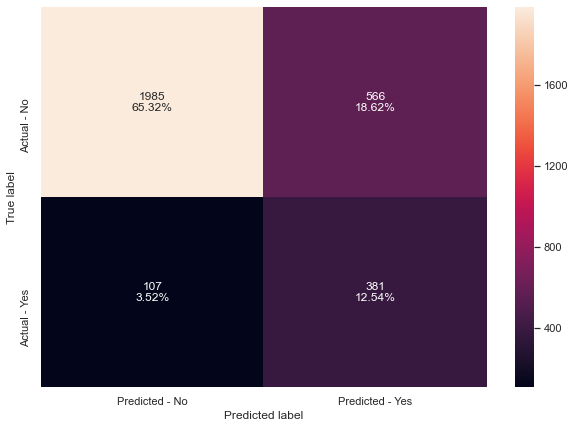

In [134]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

- Performance on the training set improved but the model is not able to replicate the same for the test set.
- Model is overfitting.

#### Regularization

In [135]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.709867204572197
Accuracy on test set :  0.7854557420204015
Recall on training set :  0.578416540595058
Recall on test set :  0.5245901639344263
Precision on training set :  0.7847206385404789
Precision on test set :  0.378698224852071


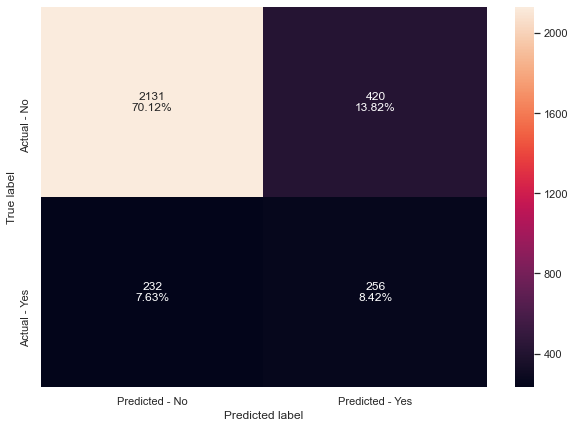

In [136]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

- After regularization, overfitting has reduced to some extent and the model is also performing well.
- Let's try undersampling now.

### Undersampling train data using SMOTE

In [137]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [138]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1139
Before Under Sampling, counts of label 'No': 5949 

After Under Sampling, counts of label 'Yes': 1139
After Under Sampling, counts of label 'No': 1139 

After Under Sampling, the shape of train_X: (2278, 19)
After Under Sampling, the shape of train_y: (2278,) 



### Logistic Regression on undersampled data

In [139]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

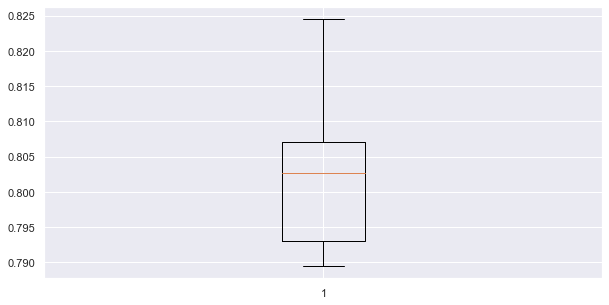

In [140]:
# kfold and cross_val
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

- Performance of model on training set varies between 0.78 to 0.82, which is an improvement from the initial model(without oversampling)
- Let's check the performance on the test set.

Accuracy on training set :  0.8081650570676031
Accuracy on test set :  0.8068443566962816
Recall on training set :  0.8024582967515365
Recall on test set :  0.7848360655737705
Precision on training set :  0.8117229129662522
Precision on test set :  0.44277456647398844


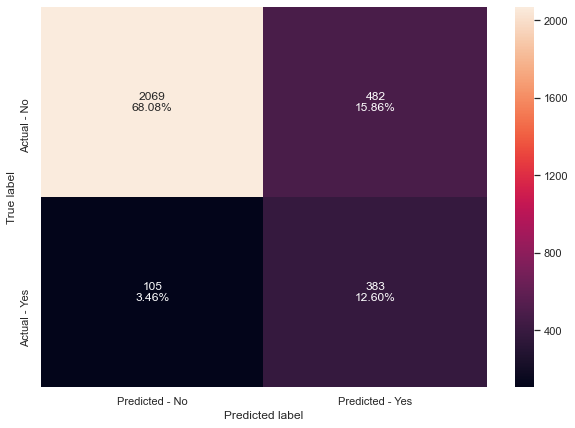

In [141]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

- Model has given a generalized performance on training and test set.
- Model performance has improved using downsampling - Logistic regression is now able to differentiate well between positive and negative classes.

### Model building - Bagging and Boosting
- Build Decision tree, random forest, bagging classifier models - Build Xgboost, AdaBoost, and gradient boosting models

#### Build base models

In [106]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 58.21044903006415
RF: 79.89373212767602
GBM: 83.84341912048845
ADB: 84.02117628873947
XGB: 87.97124971017854
DTREE: 80.15843573691939


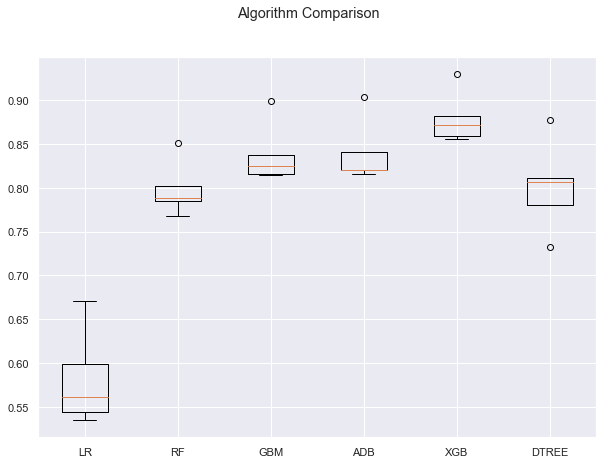

In [107]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

Per my understanding of the criteria:

1. I created my base models and scored them. I created a Pipeline to build each models (Decision Tree, Random Forest, Bagging, AdaBoost, Gradient and XGBoost) in one go. Then I proceeded to the next criteria below.

2. I created pipe_line(s) for each of the model classifiers (Decision Tree, Random Forest, Bagging, AdaBoost, Gradient and XGBoost) and then used GridSearchCV to find the best parameters and based on the best parameters, I used them to create another pipe_line to re-build the model, fit and score.  Refer to the notebooks from the Weekly Mentor Case Studies and Practice Case Studies for hyperparameter usage guidance.

3. I repeated #2 above using RandomizedSearchCV.

So this was the approach I've undertaken.   I hope this helps.  Good luck!

### Hyperparameter tuning

In [181]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [109]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree

In [168]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__max_depth": np.arange(1, 10, 2)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 7} 
Score: 0.7893229770461396
CPU times: user 874 ms, sys: 26.7 ms, total: 900 ms
Wall time: 919 ms


In [169]:
# Creating new pipeline with best parameters
dt_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(max_depth=7),
)

# Fit the model on training data
dt_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=7))])

Accuracy on training set :  0.9662810383747178
Accuracy on test set :  0.9450477130635078
Recall on training set :  0.8533801580333626
Recall on test set :  0.8114754098360656
Precision on training set :  0.9310344827586207
Precision on test set :  0.8407643312101911


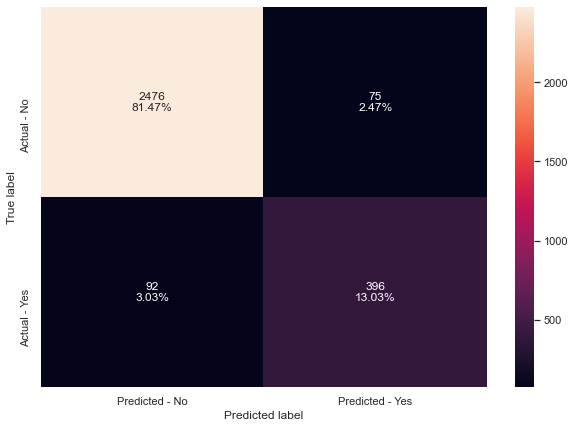

In [172]:
# Calculating different metrics
get_metrics_score(dt_tuned1)

# Creating confusion matrix
make_confusion_matrix(dt_tuned1, y_test)

- The test recall has increased to 81% compared to cross validated recall of 80% which indicates model is able to predict 80% of overall attrited customers correctly
- The tuned decision tree model is slightly overfitting the training data

#### DT with RandomizedSearchCV

In [173]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=7))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "decisiontreeclassifier__max_depth": np.arange(1, 10, 2)
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
dt_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
dt_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(dt_tuned2.best_params_,dt_tuned2.best_score_))

Best parameters are {'decisiontreeclassifier__max_depth': 7} with CV score=0.7893191127598733:
CPU times: user 832 ms, sys: 17.9 ms, total: 850 ms
Wall time: 852 ms


Accuracy on training set :  0.8533801580333626
Accuracy on test set :  0.8094262295081968
Recall on training set :  0.8533801580333626
Recall on test set :  0.8094262295081968
Precision on training set :  0.9310344827586207
Precision on test set :  0.844017094017094


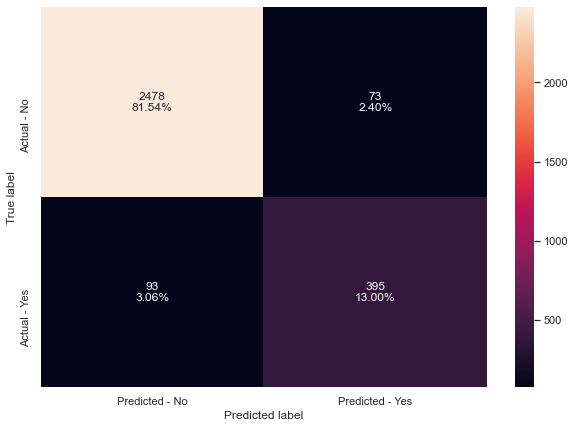

In [174]:
# Calculating different metrics
get_metrics_score(dt_tuned2)

# Creating confusion matrix
make_confusion_matrix(dt_tuned2, y_test)

- Grid search and random search took almost same time but random search was faster in computation
- Recall on test set with grid search shows slight improvment compared to random search

### Random forest

In [175]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__max_depth": np.arange(1, 10, 2),
    "randomforestclassifier__n_estimators": np.arange(10,110,10)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_depth': 9, 'randomforestclassifier__n_estimators': 80} 
Score: 0.7559432722776103
CPU times: user 1min 2s, sys: 601 ms, total: 1min 3s
Wall time: 1min 3s


In [176]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(max_depth=9, n_estimators=80),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=9, n_estimators=80))])

Accuracy on training set :  0.9751693002257337
Accuracy on test set :  0.9463639355051003
Recall on training set :  0.8683055311676909
Recall on test set :  0.7479508196721312
Precision on training set :  0.9743842364532019
Precision on test set :  0.9012345679012346


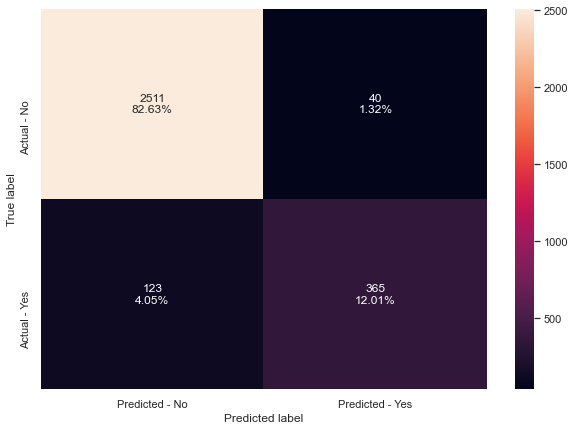

In [177]:
# Calculating different metrics
get_metrics_score(rf_tuned1)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

- The test recall has decreased to 74% compared to cross validated recall 
- The tuned RF model is slightly overfitting the training data

#### RF with RandomizedSearchCV

In [178]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "randomforestclassifier__max_depth": np.arange(1, 10, 2),
    "randomforestclassifier__n_estimators": np.arange(10,110,10)
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
rf_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
rf_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(rf_tuned2.best_params_,rf_tuned2.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_depth': 9} with CV score=0.7559432722776103:
CPU times: user 1min 1s, sys: 506 ms, total: 1min 2s
Wall time: 1min 2s


Accuracy on training set :  0.8762071992976295
Accuracy on test set :  0.7233606557377049
Recall on training set :  0.8762071992976295
Recall on test set :  0.7233606557377049
Precision on training set :  0.9755620723362659
Precision on test set :  0.9074550128534704


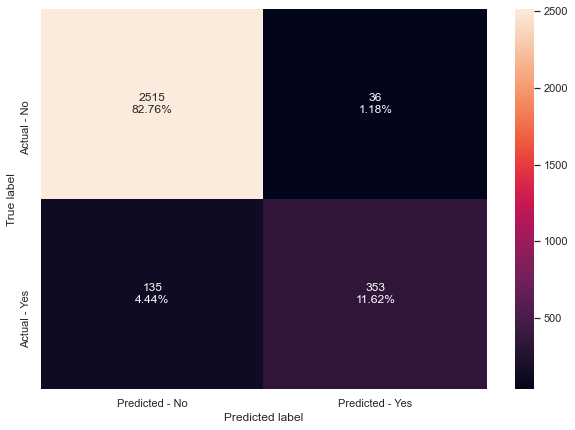

In [179]:
# Calculating different metrics
get_metrics_score(rf_tuned2)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

- Grid search and random search took almost same time but random search was faster in computation
- Recall on test set with grid search shows slight improvment compared to random search

### Adaboost

In [110]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 40} 
Score: 0.870952160136023
CPU times: user 7min 8s, sys: 2.18 s, total: 7min 10s
Wall time: 11min 43s


In [111]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.9957674943566591
Accuracy on test set :  0.9674234945705824
Recall on training set :  0.9824407374890255
Recall on test set :  0.8790983606557377
Precision on training set :  0.9911426040744021
Precision on test set :  0.9147121535181236


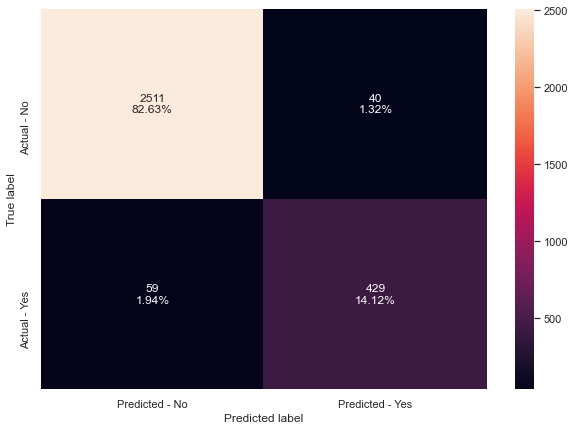

In [112]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- The test recall has increased to 87% compared to cross validated recall of 84% which indicates model is able to predict 87% of overall attrited customers correctly
- The tuned adaboost model is slightly overfitting the training data

#### Adaboost with RandomizedSearchCV

In [113]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8700826957260993:
CPU times: user 2min 30s, sys: 721 ms, total: 2min 31s
Wall time: 2min 31s


Accuracy on training set :  0.9771729587357331
Accuracy on test set :  0.8852459016393442
Recall on training set :  0.9771729587357331
Recall on test set :  0.8852459016393442
Precision on training set :  0.9884547069271759
Precision on test set :  0.9152542372881356


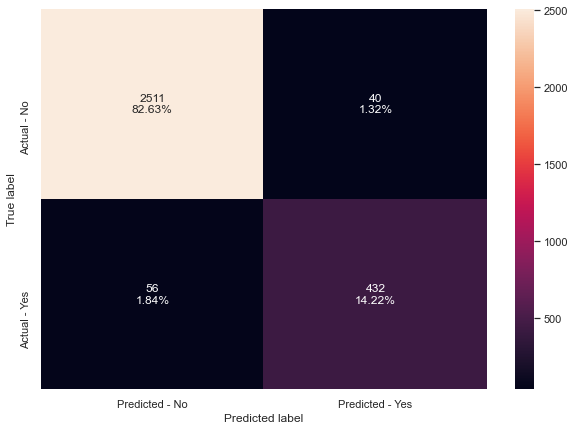

In [114]:
# Calculating different metrics
get_metrics_score(abc_tuned2)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

- Grid search took 11 minutes while randomized search took only 2 minutes  
- This difference would further increase as the number of parameters increases but the parameters from random search are exactly the same as compared grid search.
- Recall on test set with randomized search shows slight improvment compared to grid search

### XGboost

In [115]:

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(100,300,100),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.05], 'xgbclassifier__gamma':[1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))


Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.9} with CV score=0.9473297781899683:


In [116]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9205699774266366
Accuracy on test set :  0.8979927607765712
Recall on training set :  0.9850746268656716
Recall on test set :  0.9241803278688525
Precision on training set :  0.6726618705035972
Precision on test set :  0.6229281767955801


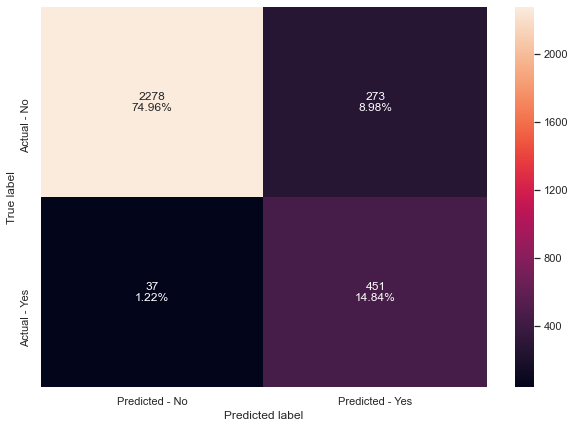

In [117]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- The test recall has increased from 87% to 92% compared to cross val recall
- The tuned xgboost model is slightly overfitting the training data

#### RandomizedSearchCV

In [118]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 1} with CV score=0.9605108586444084:
CPU times: user 12min 59s, sys: 6.57 s, total: 13min 5s
Wall time: 1min 41s


In [121]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=250,
                scale_pos_weight=10,
                gamma=1,
                subsample=0.9,
                learning_rate= 0.05,
                eval_metric='logloss', max_depth = 2, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.7602990970654627
Accuracy on test set :  0.7512339585389931
Recall on training set :  0.9675153643546971
Recall on test set :  0.9610655737704918
Precision on training set :  0.3986975397973951
Precision on test set :  0.3888888888888889


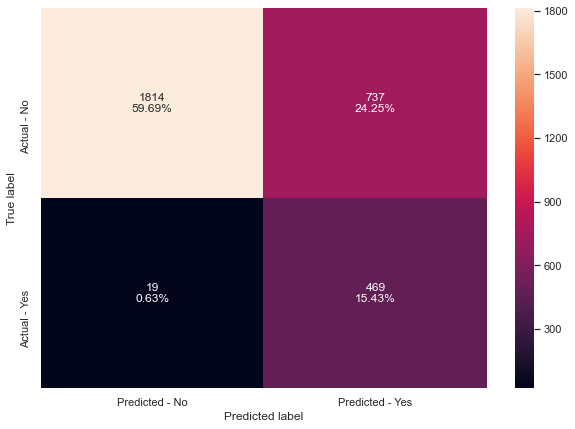

In [120]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- Grid search took 20 minutes while randomized search took only 2 minutes
- This difference would further increase as the number of parameters increases but the parameters from random search are exactly the same as compared grid search.
- Recall on test set with randomized search shows slight improvment compared to grid search

### Model Performances

#### Comparing all models

In [186]:
# defining list of models
models = [dt_tuned1, dt_tuned2, rf_tuned1, rf_tuned2, abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2, log_reg_over, log_reg_under, lr_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [187]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "DT with GridSearchCV",
            "DT with RandomizedSearchCV",
            "RF with GridSearchCV",
            "RF with RandomizedSearchCV",
            "Adaboost with GridSearchCV",
            "Adaboost with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
            "Logistic regression with oversampling",
            "Logistic regression with undersampling",
            "Logistic regression with regularization",
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
7           XGBoost with RandomizedSearchCV        0.914503       0.906548   
6                 XGBoost with GridSearchCV        0.920570       0.897993   
5          Adaboost with RandomizedSearchCV        0.977173       0.885246   
4                Adaboost with GridSearchCV        0.995767       0.967423   
0                      DT with GridSearchCV        0.966281       0.945048   
1                DT with RandomizedSearchCV        0.853380       0.809426   
9    Logistic regression with undersampling        0.824492       0.806844   
8     Logistic regression with oversampling        0.804317       0.778546   
2                      RF with GridSearchCV        0.975169       0.946364   
3                RF with RandomizedSearchCV        0.876207       0.723361   
10  Logistic regression with regularization        0.797122       0.785456   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  
7       0.986831     0.975410         0.655394        0.636364  
6       0.985075     0.924180         0.672662        0.622928  
5       0.977173     0.885246         0.988455        0.915254  
4       0.982441     0.879098         0.991143        0.914712  
0       0.853380     0.811475         0.931034        0.840764  
1       0.853380     0.809426         0.931034        0.844017  
9       0.802458     0.784836         0.472840        0.442775  
8       0.784021     0.780738         0.439036        0.402323  
2       0.868306     0.747951         0.974384        0.901235  
3       0.876207     0.723361         0.975562        0.907455  
10      0.566286     0.524590         0.405916        0.378698

- The xgboost model tuned using randomised search is giving the best test recall of 0.97 but it has the least train precision.
- Let's see the feature importance from the tuned xgboost model

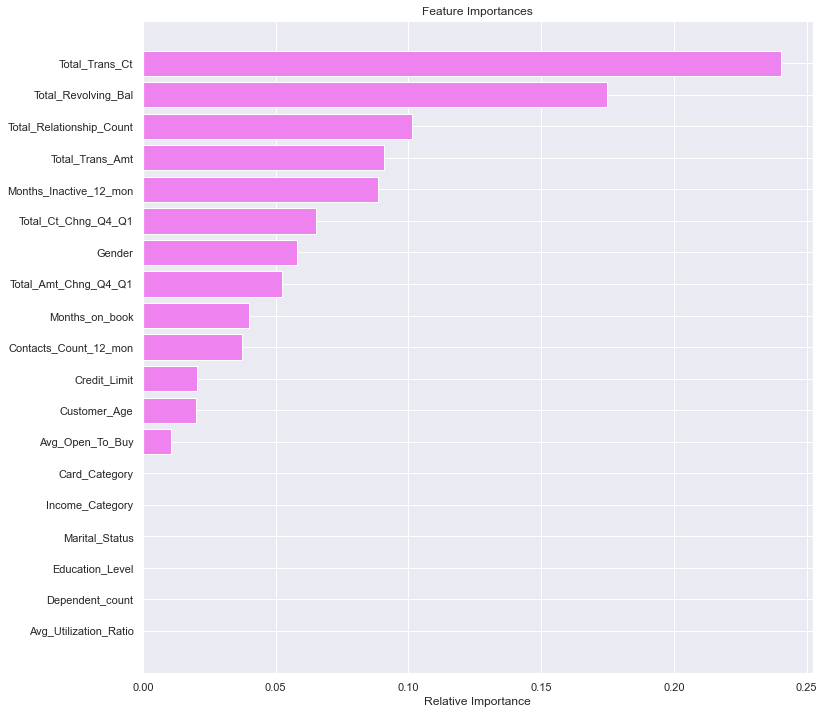

In [143]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total transaction count is the most important feature, followed by Total revolving balance and Total relationship count

#### Grid search vs Randomized search observations:
- In case of Decision Tree and Random Forest, both grid search and randomized search took similar amount of time to run
- In case of Adaboost and XGboost, grid search took longer time compared to randomized search (Computation time provided under each algorithm)

#### Actionable Insights & Recommendations

- Company should target customers who has a low total transaction count and make offers to retain those customers otherwise they will end up losing those customers. 
- We observed in our analysis that ~46% of customers are married but single customers are more equally or more likely not churn if we target them with offers. 
- Customers with higher no of months inactive are more likely to churn so we need to target customers who are not active for few months with offers
- Customers wuth lower total transaction count and transaction amount is highly likely to churn hence we need to target these customers with better offers so we can increase their total transaction activity and avoid losing them
- Customers with lower credit limit are more likely to churn thus we need to offer more credit to customers in order to retain them
- Customers with lower change in avg utilization ratio are more likely to churn thus we need to provide better offers so as to improve their avg utilization rate and avoid losing the customer.